# Exploratory Data Analysis
### Understanding the ERA5 Data

ERA5 is the fifth iteration of the ECMWF atmospheric reanalysis of the global climate.

##### Running this notebook
Use the same python kernel which is used for running modules. Ensure that the required jupyter packages are installed (these are specified in requirements.txt).

In [1]:
import sys
from pathlib import Path

# Make project root importable
ROOT = Path().resolve().parents[1]
sys.path.append(str(ROOT))

In [2]:
from src.config.env_loader import *

In [3]:
# environmental variables

DATA_HOME = get_env_var("DATA_HOME") # must be set in .env file
ERA5_PATH_SUFFIX = "era5"  # subdirectory for ERA5 data within DATA_HOME.

ERA5_DATA_PATH = os.path.join(DATA_HOME, ERA5_PATH_SUFFIX) # set this to a custom path if needed

In [4]:
from src.data_processing.era5_processor import ProcessERA5
from src.data_processing.topology_processor import ProcessTopography
import xarray as xr

In [5]:
# confirm that the ERA5 data loads correctly
ds_surface  = ProcessERA5().load_ds(mode="surface")
ds_pressure = ProcessERA5().load_ds(mode="pressure")

# confirm that the topography data loads correctly
ds_topo = ProcessTopography().load_ds()

['/mnt/hdd/niwa/baseline_ConvGNP/data/era5/surface/2020/01/ERA5_20200102_surface.nc', '/mnt/hdd/niwa/baseline_ConvGNP/data/era5/surface/2020/01/ERA5_20200101_surface.nc']
['/mnt/hdd/niwa/baseline_ConvGNP/data/era5/pressure/2020/01/ERA5_20200101_pressure.nc', '/mnt/hdd/niwa/baseline_ConvGNP/data/era5/pressure/2020/01/ERA5_20200102_pressure.nc']


In [6]:
print(ds_surface)

<xarray.Dataset> Size: 5MB
Dimensions:     (valid_time: 48, latitude: 73, longitude: 61)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 384B 2020-01-01 ... 2020-01-02T23...
  * latitude    (latitude) float64 584B -32.0 -32.25 -32.5 ... -49.75 -50.0
  * longitude   (longitude) float64 488B 165.0 165.2 165.5 ... 179.5 179.8 180.0
    number      int64 8B 0
    expver      (valid_time) <U4 768B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    u10         (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    d2m         (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 855kB dask.array<chunksize=(24, 73, 61), meta=np.ndarray>
    lsm         (valid_time, latitude, longitude) float32 855kB dask.a

In [7]:
print(ds_pressure)

<xarray.Dataset> Size: 56MB
Dimensions:         (valid_time: 48, pressure_level: 11, latitude: 73,
                     longitude: 61)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 384B 2020-01-01 ... 2020-01-0...
  * pressure_level  (pressure_level) float64 88B 100.0 70.0 50.0 ... 3.0 2.0 1.0
  * latitude        (latitude) float64 584B -32.0 -32.25 -32.5 ... -49.75 -50.0
  * longitude       (longitude) float64 488B 165.0 165.2 165.5 ... 179.8 180.0
    number          int64 8B 0
    expver          (valid_time) <U4 768B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 9MB dask.array<chunksize=(24, 11, 73, 61), meta=np.ndarray>
    r               (valid_time, pressure_level, latitude, longitude) float32 9MB dask.array<chunksize=(24, 11, 73, 61), meta=np.ndarray>
    q               (valid_time, pressure_level, latitude, longitude) float32 9MB dask.array<chunksize=(24, 11, 73, 61), 

In [8]:
print(ds_topo)

<xarray.Dataset> Size: 479MB
Dimensions:    (lat: 10938, lon: 10937)
Coordinates:
  * lat        (lat) float32 44kB -48.0 -48.0 -48.0 -48.0 ... -34.0 -34.0 -34.0
  * lon        (lon) float32 44kB 166.0 166.0 166.0 166.0 ... 180.0 180.0 180.0
Data variables:
    elevation  (lat, lon) float32 479MB ...
Attributes:
    crs:          EPSG:4326
    nodata:       nan
    institution:  Bodeker Scientific
    author:       Greg Bodeker / William Naylor
    email:        greg@bodekerscientific.com
    created:      2023-11-08 03:54:55 UTC
    script:       topo_convert_L8m.py
    conda_env:    The conda environment as at the time of committing the abov...
    script_sha:   7cc03c50847619e02211950c9204a30f4c6b205f


In [9]:
date = "2020-01-02T22:00"

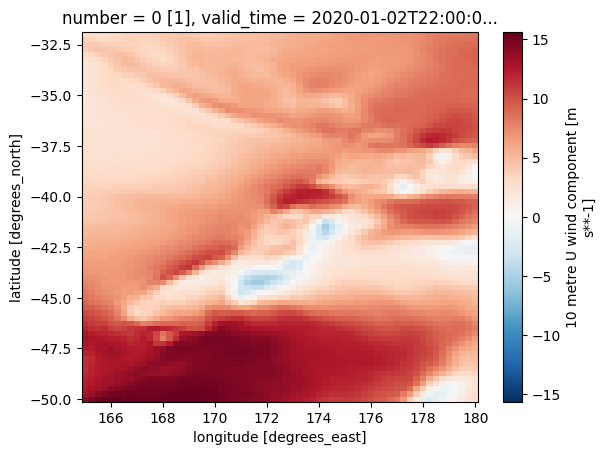

In [10]:
ds_surface.sel(valid_time=date)['u10'].plot()

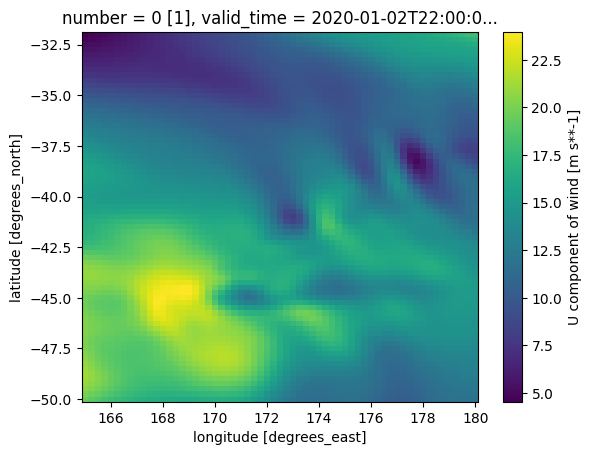

In [11]:
ds_pressure.sel(valid_time="2020-01-02T22:00")['u'].isel(pressure_level=0).plot()

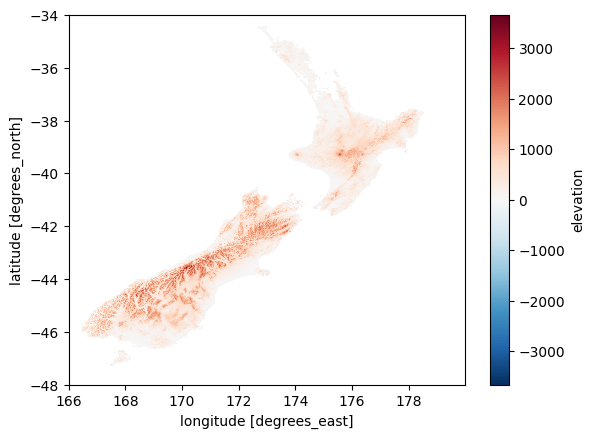

In [12]:
# plot topography
ds_topo['elevation'].plot()